In [49]:
# import necessary packages
%reload_ext autoreload
%autoreload 2

import random
import utilsRL
import matplotlib.pyplot as plt
import numpy as np
import syntheticChrissAlmgren as sca
from syntheticChrissAlmgren import MarketEnvironment
from ddpg_agent import Agent
from collections import deque


In [2]:
# Get the default financial and AC Model parameters
financial_params, ac_params = utilsRL.get_env_param()

In [3]:
financial_params

Annual Volatility:,100%,Bid-Ask Spread:,0.062
Daily Volatility:,95.0%,Daily Trading Volume:,"5,000,000"


In [7]:
ac_params

Total Number of Shares to Sell:,"1,000,000",Fixed Cost of Selling per Share:,$0.006
Starting Price per Share:,$50.00,Trader's Risk Aversion:,2e-15
Price Impact for Each 1% of Daily Volume Traded:,$2.4999999999999998e-06,Permanent Impact Constant:,2.1e-07
Number of Days to Sell All the Shares:,5,Single Step Variance:,0.902
Number of Trades:,5,Time Interval between trades:,1.0


Average Implementation Shortfall: $-1,403,186.92
Standard Deviation of the Implementation Shortfall: $4,122,935.79


array([-1365183.73736233, -1347553.7302254 , -1365487.66381297, ...,
       -1335811.36934675, -1422227.87503444, -1338284.82076767])

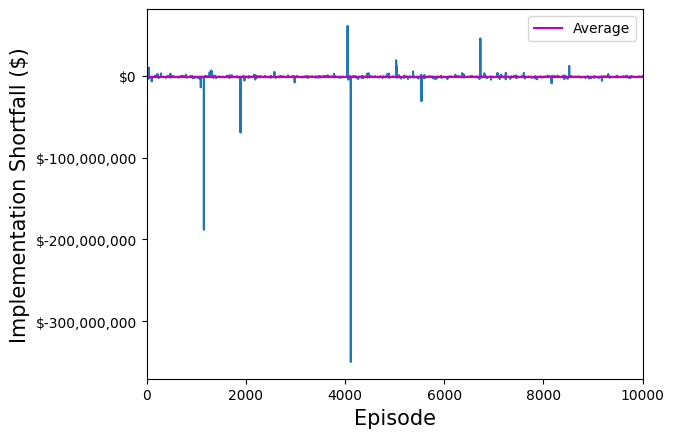

In [50]:
utilsRL.get_av_std(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-15), trs = 10000)

Implementation Shortfall: $2,436,039.07 



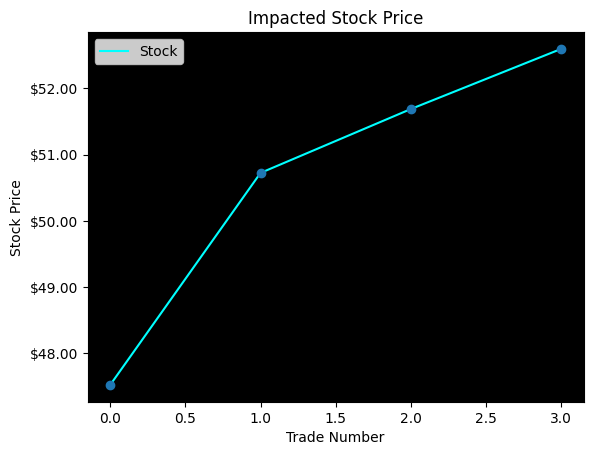

In [42]:
utilsRL.implement_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-4))

TypeError: 'module' object is not callable

In [123]:
print(round(-1389705.42/1e6,5))
print(round(3419349.69**2/1e12,5))

-1.38971
11.69195


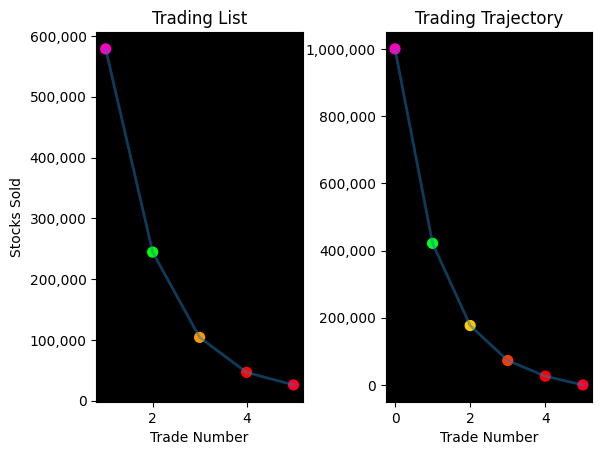


Number of Shares Sold: 1,000,000



,Trade Number,Stocks Sold,Stocks Remaining
0,0.0,0.000000,1.000000e+06
1,1.0,578703.778310,4.212962e+05
2,2.0,244481.305988,1.768149e+05
3,3.0,104210.600421,7.260432e+04
4,4.0,46612.187463,2.599213e+04
5,5.0,25992.127817,2.328306e-10


In [126]:
utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-6), show_trl = False)


In [ ]:
50*(1+np.random.standard_t(1)/100)

In [130]:
# Create simulation environment
env = sca.MarketEnvironment()

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(), random_seed=42)

# Set the liquidation time
lqt = 5

# Set the number of trades
n_trades = 5

# Set trader's risk aversion
tr = 2*10**(-4)

# Set the number of episodes to run the simulation
episodes = 10000

shortfall_hist = np.array([])
shortfall_deque = deque(maxlen=100)

for episode in range(episodes): 
    # Reset the enviroment
    cur_state = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb = tr)

    # set the environment to make transactions
    env.start_transactions()

    for i in range(n_trades + 1):
      
        # Predict the best action for the current state. 
        action = agent.act(cur_state, add_noise = True)
        
        # Action is performed and new state, reward, info are received. 
        new_state, reward, done, info = env.step(action)
        
        # current state, action, reward, new state are stored in the experience replay
        agent.step(cur_state, action, reward, new_state, done)
        
        # roll over new state
        cur_state = new_state

        if info.done:
            shortfall_hist = np.append(shortfall_hist, info.implementation_shortfall)
            shortfall_deque.append(info.implementation_shortfall)
            break
        
    if (episode + 1) % 100 == 0: # print average shortfall over last 100 episodes
        print('\rEpisode [{}/{}]\tAverage Shortfall: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque)))        

print('\nAverage Implementation Shortfall: ${:,.2f} \n'.format(np.mean(shortfall_hist)))
print('\nstd Implementation Shortfall: ${:,.2f} \n'.format(np.std(shortfall_hist)))

Episode [100/10000]	Average Shortfall: $1,963,991.37
Episode [200/10000]	Average Shortfall: $2,505,826.46
Episode [300/10000]	Average Shortfall: $2,506,250.00
Episode [400/10000]	Average Shortfall: $2,506,250.00
Episode [500/10000]	Average Shortfall: $2,506,250.00
Episode [600/10000]	Average Shortfall: $2,506,250.00
Episode [700/10000]	Average Shortfall: $2,506,250.00
Episode [800/10000]	Average Shortfall: $2,506,250.00
Episode [900/10000]	Average Shortfall: $2,506,250.00
Episode [1000/10000]	Average Shortfall: $2,505,633.79
Episode [1100/10000]	Average Shortfall: $1,839,857.09
Episode [1200/10000]	Average Shortfall: $6,008,337.49
Episode [1300/10000]	Average Shortfall: $6,575,301.48
Episode [1400/10000]	Average Shortfall: $5,976,539.09
Episode [1500/10000]	Average Shortfall: $7,078,836.27
Episode [1600/10000]	Average Shortfall: $6,424,882.14
Episode [1700/10000]	Average Shortfall: $6,173,724.86
Episode [1800/10000]	Average Shortfall: $6,781,814.24
Episode [1900/10000]	Average Shortfal

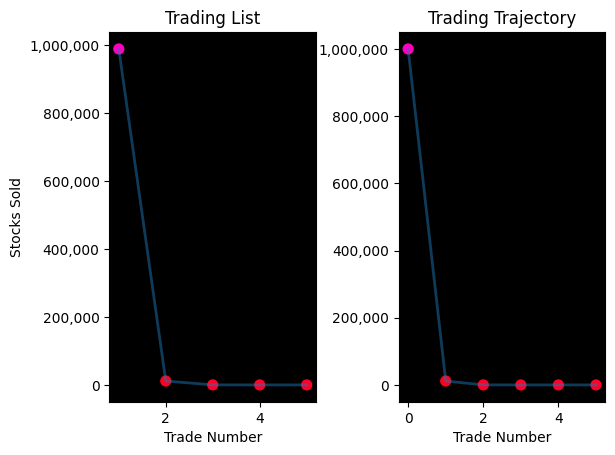


Number of Shares Sold: 1,000,000



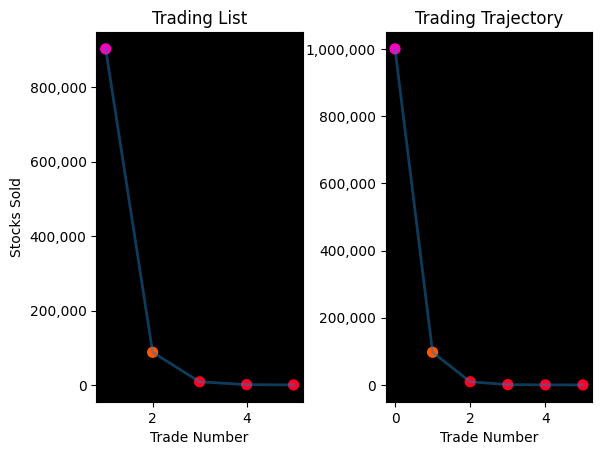


Number of Shares Sold: 1,000,000



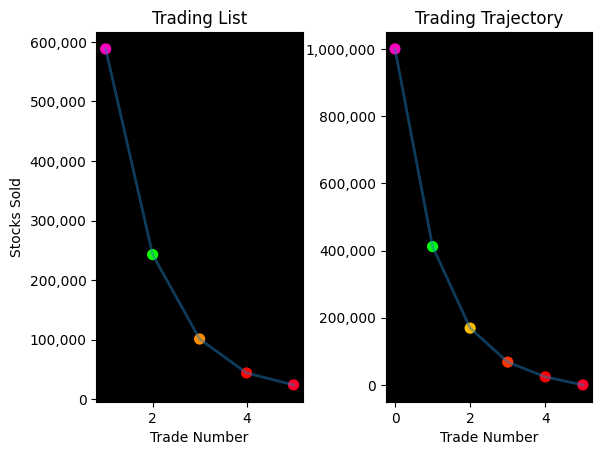


Number of Shares Sold: 1,000,000



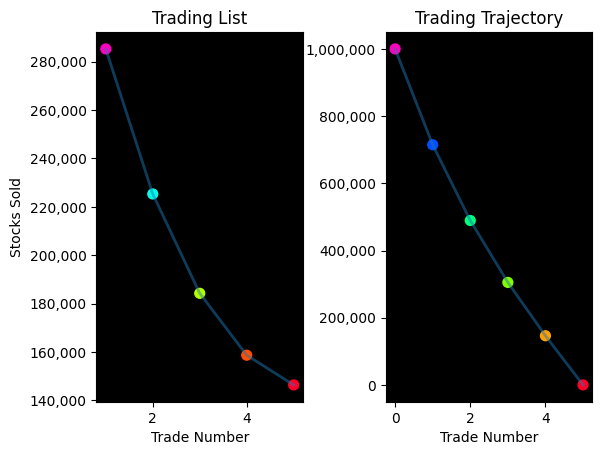


Number of Shares Sold: 1,000,000



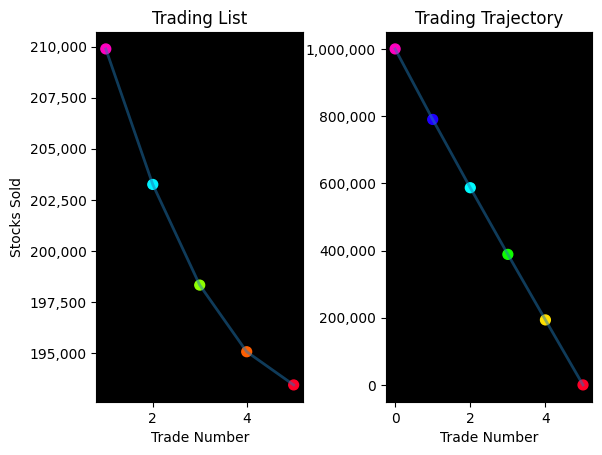


Number of Shares Sold: 1,000,000



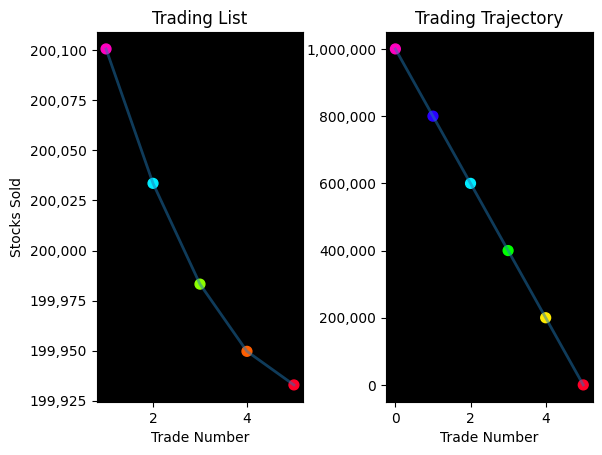


Number of Shares Sold: 1,000,000



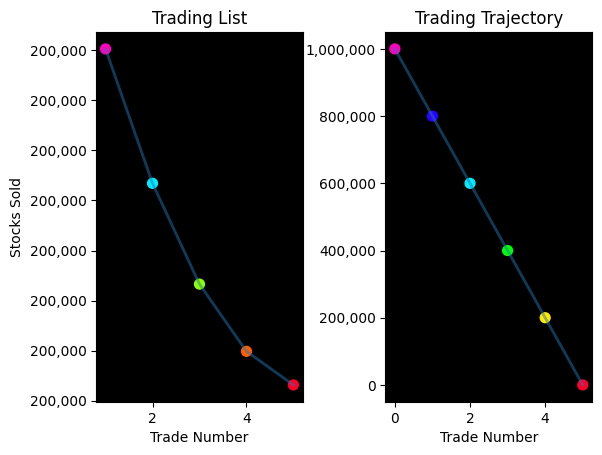


Number of Shares Sold: 1,000,000



In [60]:
rl_4 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-4), show_trl = False)['Stocks Remaining']
rl_5 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-5), show_trl = False)['Stocks Remaining']
rl_6 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-6), show_trl = False)['Stocks Remaining']
rl_7 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-7), show_trl = False)['Stocks Remaining']
rl_8 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-8), show_trl = False)['Stocks Remaining']
rl_10 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-10), show_trl = False)['Stocks Remaining']
rl_11 = utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-15), show_trl = False)['Stocks Remaining']

In [ ]:
utilsRL.plot_trade_list(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-6), show_trl = False)

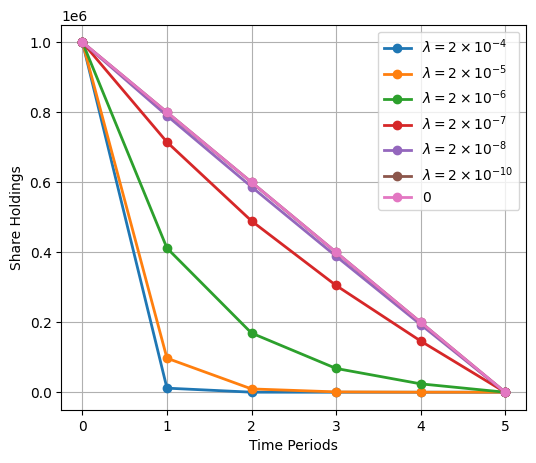

In [61]:
# Plotting
plt.figure(figsize=(6,5),dpi=100)
plt.plot(rl_4,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-4}$')
plt.plot(rl_5,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-5}$')
plt.plot(rl_6,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-6}$')
plt.plot(rl_7,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-7}$')
plt.plot(rl_8,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-8}$')
plt.plot(rl_10,marker='o', lw=2.0, label=r'$\lambda = 2 \times 10^{-10}$')
plt.plot(rl_11,marker='o', lw=2.0, label=r'0')
#plt.plot(N_opts[1],marker='o', lw=2.0, label=r'$\lambda$ = '+str(risks[1]))
#plt.plot(N_opts[2], marker='o', lw=2.0, label=r'$\lambda$ = '+str(risks[2]))

plt.grid(True)
#plt.title('Optimal trajectories for '+benchmark)
plt.xlabel(r'Time Periods')
plt.ylabel(r'Share Holdings')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yticks([0*10**5, 2*10**5, 4*10**5, 6*10**5, 8*10**5,10*10**5])
plt.legend(loc='best',frameon=True)
#plt.savefig('liquidation_IS.png')
plt.show()

In [ ]:
utilsRL.get_av_std(lq_time = 5, nm_trades = 5, tr_risk = 2*10**(-6), trs = 10000)



In [ ]:
print(round(669542.18/1e6,5))
print(round(227217.48**2/1e12,5))